In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
sys.path.append('../src')

from graph_utils import *
from performance_utils import *
from metropolis import *
from houdayer_algorithm import *

In [2]:
# Define the parameters
N = 100     # number of nodes
d = 5       # degree
r = 0.1     # b/a

a = (2. * d) / (1. + r)
b = a * r

print(f'd = {d}')
print(f'r = {r:.4f}')
print(f'r_c = {(np.sqrt(d)-1)/(np.sqrt(d)+1):.4f}')
print(f'a = {a:.4f}')
print(f'b = {b:.4f}')

d = 5
r = 0.1000
r_c = 0.3820
a = 9.0909
b = 0.9091


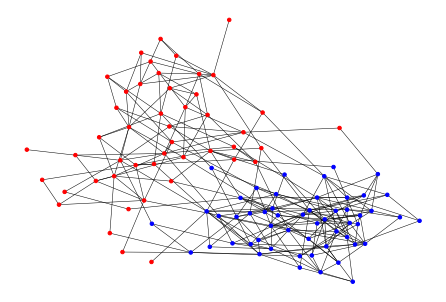

In [4]:
# Initialize random seed
#np.random.seed(0)

# Generate random state
x_star = generate_population(N)
G = graph_gen(x_star, a, b)
A = nx.to_numpy_array(G)

draw_graph(G, x_star)

# Simulations

In [54]:
nexp = 100   # Number of experiments
T = 4000    # Number of steps

## Metropolis

In [68]:
def run_metropolis(A, a, b, num_exp, T):
    Q = np.empty((num_exp, T))
    mc = Metropolis(A, a, b)
    for n in tqdm(range(num_exp)):
        mc.reset()
        for i in range(T):
            mc.step()
            Q[n, i] = compute_overlap(x_star, mc.x)
    return Q

In [74]:
def draw_plots(Q):
    plt.figure()
    plt.plot(Q[:,-1])
    plt.xlabel('Experiment')
    plt.ylabel('q')
    plt.title('Limiting Overlap Over Expermients');
    
    avg = np.average(Q, axis=0)
    plt.figure()
    plt.plot(avg)
    plt.xlabel('t')
    plt.ylabel('q')
    plt.ylim(top=1.)
    plt.title('Average Overlap Over Time');
    
    print(f'Average limiting overlap: {avg[-1]:.4f}')

In [75]:
Q = run_metropolis(A, a, b, nexp, T)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.34it/s]


Average limiting overlap: 0.9088


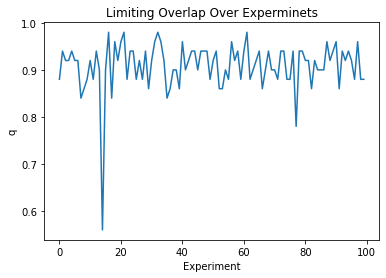

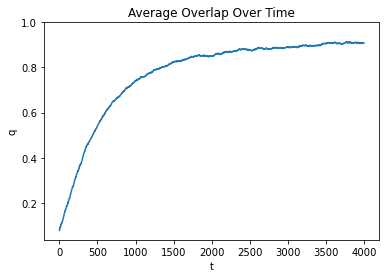

In [76]:
draw_plots(Q)

## Houdayer-1 

In [77]:
def run_houdayer(A, a, b, num_exp, T, n0):
    Q1 = np.empty((num_exp, T))
    Q2 = np.empty((num_exp, T))
    mc1 = Metropolis(A, a, b)
    mc2 = Metropolis(A, a, b)
    for n in tqdm(range(num_exp)):
        mc1.reset()
        mc2.reset()
        for i in range(T):
            if i % n0 == 0:
                # Houdayer step
                x1, x2 = houdayer_step(G, mc1.x, mc2.x)
                mc1.x = x1
                mc2.x = x2
            mc1.step()
            mc2.step()
            Q1[n, i] = compute_overlap(x_star, mc1.x)
            Q2[n, i] = compute_overlap(x_star, mc2.x)
    return Q1, Q2

In [78]:
Q1, Q2 = run_houdayer(A, a, b, nexp, T, n0=1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:56<00:00,  1.76s/it]


Average limiting overlap: 0.9029


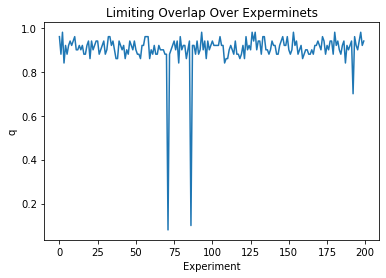

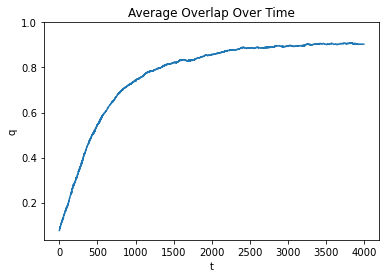

In [79]:
Q = np.vstack((Q1, Q2))
draw_plots(Q)

## Houdayer-10

In [80]:
Q1, Q2 = run_houdayer(A, a, b, nexp, T, n0=10)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.88it/s]


Average limiting overlap: 0.9111


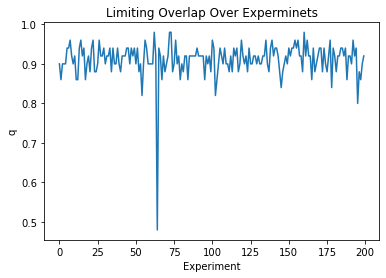

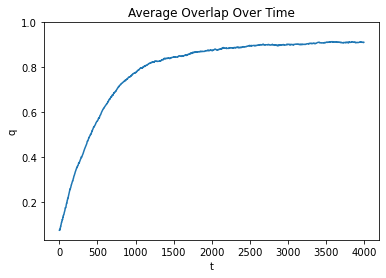

In [81]:
Q = np.vstack((Q1, Q2))
draw_plots(Q)